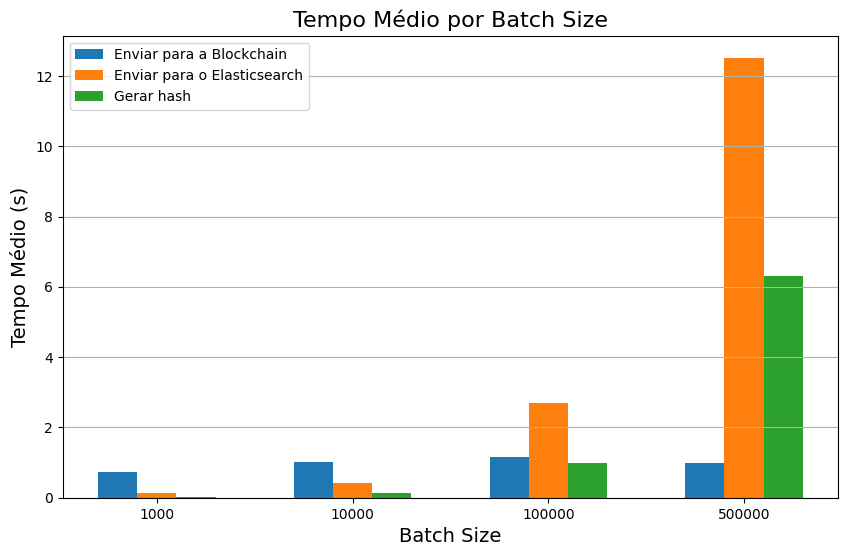

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Agrupando por Batch Size e Processo, e calculando a média dos tempos
grouped_df = df.groupby(['Batch Size', 'Processo'])['Tempo'].mean().reset_index()

# Função para plotar o gráfico de barras
def plot_bar_chart(df):
    # Obtendo os batch sizes e processos únicos
    batch_sizes = df['Batch Size'].unique()
    processos = df['Processo'].unique()

    # Definindo a largura das barras
    bar_width = 0.2
    x = np.arange(len(batch_sizes))  # Posições no eixo X

    # Criando o gráfico
    plt.figure(figsize=(10, 6))

    # Plotando as barras para cada processo
    for i, processo in enumerate(processos):
        tempos = df[df['Processo'] == processo]['Tempo']
        plt.bar(x + i * bar_width, tempos, width=bar_width, label=processo)

    # Configurações do gráfico
    plt.title('Tempo Médio por Batch Size', fontsize=16)
    plt.xlabel('Batch Size', fontsize=14)
    plt.ylabel('Tempo Médio (s)', fontsize=14)
    plt.xticks(x + bar_width, batch_sizes)  # Rótulos do eixo X
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Gerando o gráfico de barras
plot_bar_chart(grouped_df)

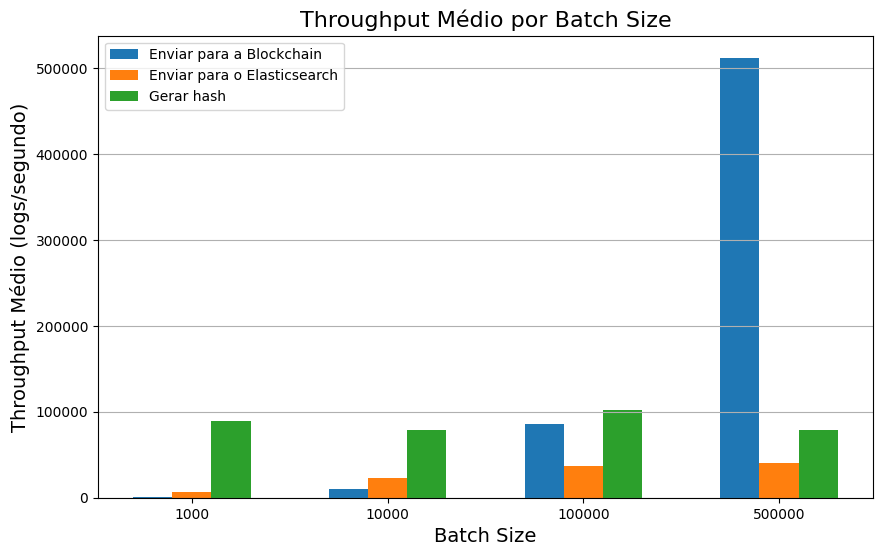

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Agrupando por Batch Size e Processo, e calculando a média dos tempos
grouped_df = df.groupby(['Batch Size', 'Processo'])['Tempo'].mean().reset_index()

# Calculando o throughput médio
grouped_df['Throughput'] = grouped_df['Batch Size'] / grouped_df['Tempo']

# Função para plotar o gráfico de barras de throughput médio
def plot_throughput_bar_chart(df):
    # Obtendo os batch sizes e processos únicos
    batch_sizes = df['Batch Size'].unique()
    processos = df['Processo'].unique()

    # Definindo a largura das barras
    bar_width = 0.2
    x = np.arange(len(batch_sizes))  # Posições no eixo X

    # Criando o gráfico
    plt.figure(figsize=(10, 6))

    # Plotando as barras para cada processo
    for i, processo in enumerate(processos):
        throughput = df[df['Processo'] == processo]['Throughput']
        plt.bar(x + i * bar_width, throughput, width=bar_width, label=processo)

    # Configurações do gráfico
    plt.title('Throughput Médio por Batch Size', fontsize=16)
    plt.xlabel('Batch Size', fontsize=14)
    plt.ylabel('Throughput Médio (logs/segundo)', fontsize=14)
    plt.xticks(x + bar_width, batch_sizes)  # Rótulos do eixo X
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Gerando o gráfico de barras de throughput médio
plot_throughput_bar_chart(grouped_df)

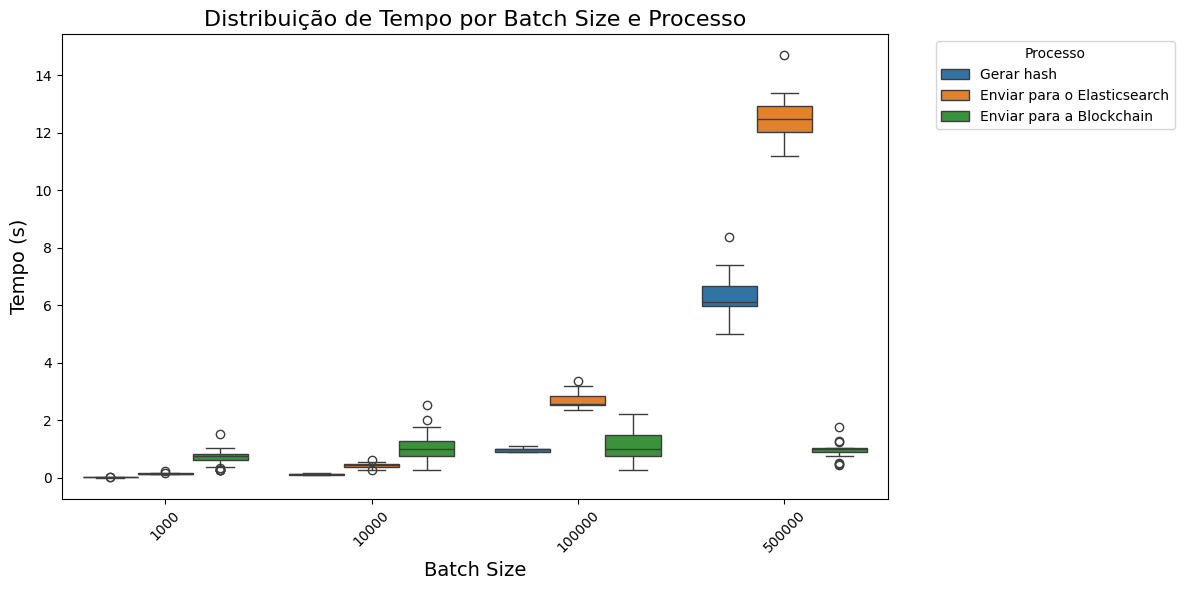

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o CSV
df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

# Aplicando a conversão de tempo
df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Criando o box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Batch Size', y='Tempo', hue='Processo', data=df)

# Configurações do gráfico
plt.title('Distribuição de Tempo por Batch Size e Processo', fontsize=16)
plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Tempo (s)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Processo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

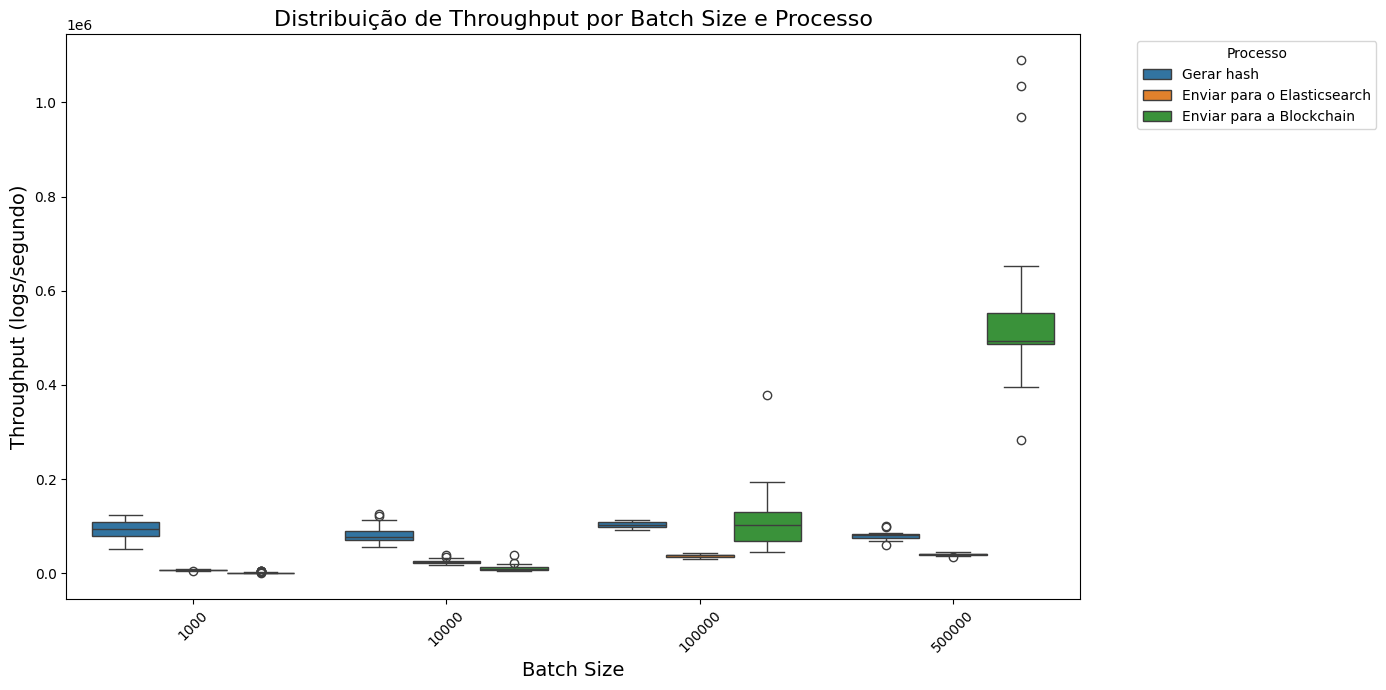

Estatísticas de Throughput:
                                        count           mean            std  \
Batch Size Processo                                                           
1000       Enviar para a Blockchain      60.0    1572.453785     784.525478   
           Enviar para o Elasticsearch   60.0    6986.772155     677.746007   
           Gerar hash                    60.0   93332.093185   19109.424662   
10000      Enviar para a Blockchain      63.0   11439.920339    5511.552151   
           Enviar para o Elasticsearch   63.0   24118.683768    4221.575780   
           Gerar hash                    63.0   80783.397632   14025.993918   
100000     Enviar para a Blockchain      12.0  121049.966779   91568.559053   
           Enviar para o Elasticsearch   12.0   37326.662730    3832.252090   
           Gerar hash                    12.0  103102.350685    7030.747500   
500000     Enviar para a Blockchain      16.0  579423.361667  237455.676079   
           Enviar para o

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o CSV
df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

# Aplicando a conversão de tempo
df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Calculando o throughput
df['Throughput'] = df['Batch Size'] / df['Tempo']

# Criando o box plot de throughput
plt.figure(figsize=(14, 7))
sns.boxplot(x='Batch Size', y='Throughput', hue='Processo', data=df)

# Configurações do gráfico
plt.title('Distribuição de Throughput por Batch Size e Processo', fontsize=16)
plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Throughput (logs/segundo)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Processo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Estatísticas descritivas do throughput
throughput_stats = df.groupby(['Batch Size', 'Processo'])['Throughput'].describe()
print("Estatísticas de Throughput:")
print(throughput_stats)

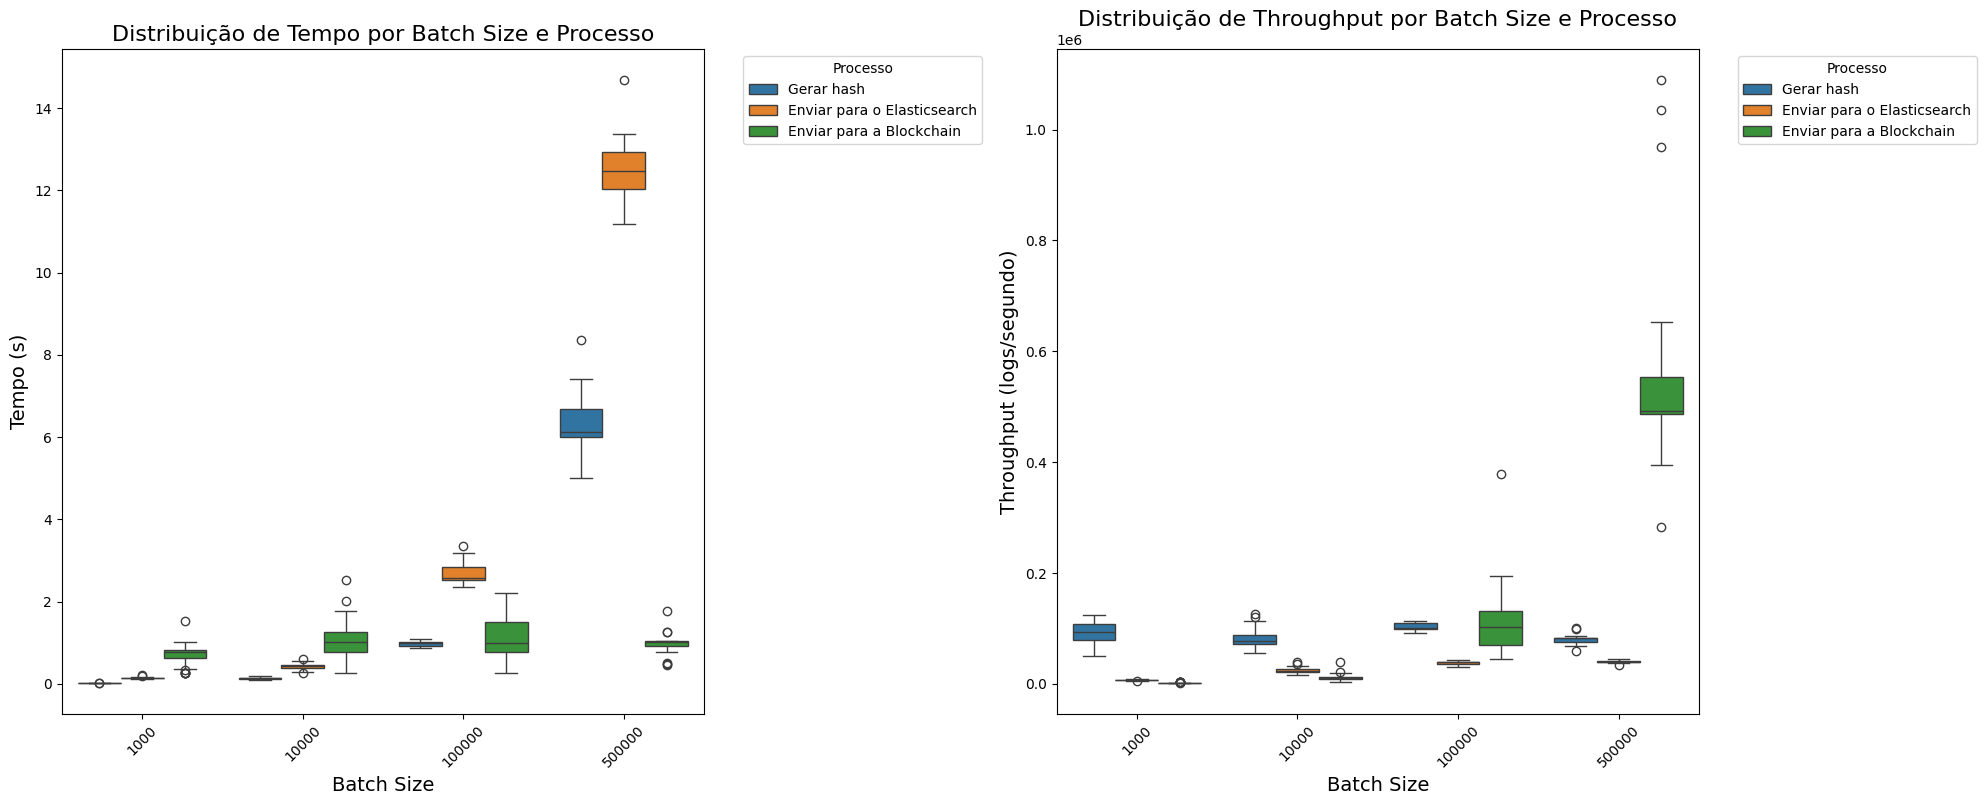

Estatísticas de Tempo:
                                        count       mean       std        min  \
Batch Size Processo                                                             
1000       Enviar para a Blockchain      60.0   0.740511  0.240999   0.262167   
           Enviar para o Elasticsearch   60.0   0.144650  0.016261   0.123000   
           Gerar hash                    60.0   0.011228  0.002646   0.008107   
10000      Enviar para a Blockchain      63.0   1.026595  0.391736   0.258671   
           Enviar para o Elasticsearch   63.0   0.426096  0.068597   0.256201   
           Gerar hash                    63.0   0.127171  0.020315   0.079305   
100000     Enviar para a Blockchain      12.0   1.160315  0.622235   0.263735   
           Enviar para o Elasticsearch   12.0   2.707585  0.304656   2.348926   
           Gerar hash                    12.0   0.974044  0.066279   0.880812   
500000     Enviar para a Blockchain      16.0   0.976257  0.323360   0.458618   
     

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o CSV
df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

# Aplicando a conversão de tempo
df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Calculando o throughput
df['Throughput'] = df['Batch Size'] / df['Tempo']

# Criando uma figura com dois subplots lado a lado
plt.figure(figsize=(20, 8))

# Subplot para Tempo
plt.subplot(1, 2, 1)
sns.boxplot(x='Batch Size', y='Tempo', hue='Processo', data=df)
plt.title('Distribuição de Tempo por Batch Size e Processo', fontsize=16)
plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Tempo (s)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Processo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Subplot para Throughput
plt.subplot(1, 2, 2)
sns.boxplot(x='Batch Size', y='Throughput', hue='Processo', data=df)
plt.title('Distribuição de Throughput por Batch Size e Processo', fontsize=16)
plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Throughput (logs/segundo)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Processo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustando o layout
plt.tight_layout()
plt.show()

# Estatísticas descritivas
print("Estatísticas de Tempo:")
print(df.groupby(['Batch Size', 'Processo'])['Tempo'].describe())

print("\nEstatísticas de Throughput:")
print(df.groupby(['Batch Size', 'Processo'])['Throughput'].describe())

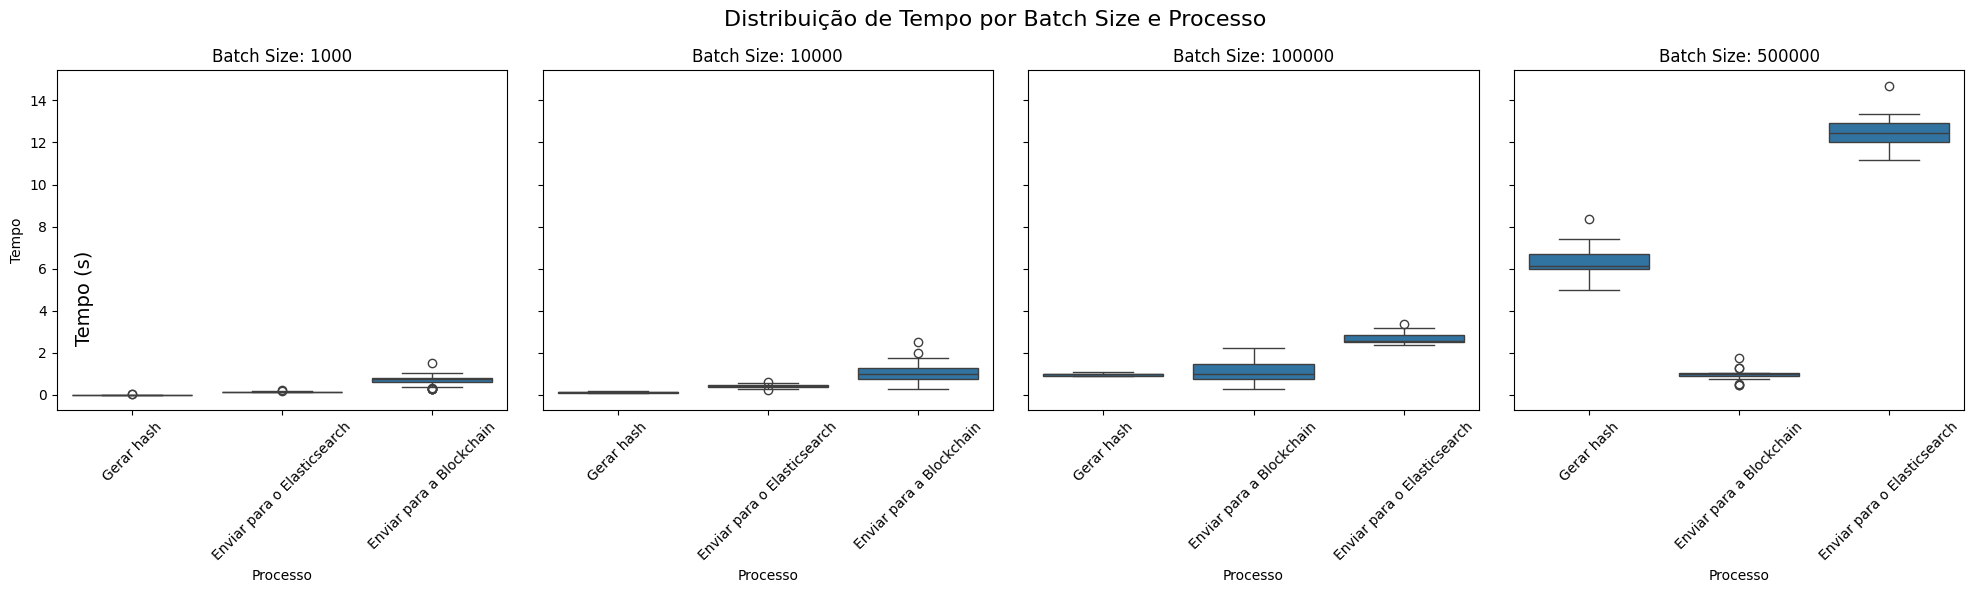

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o CSV
df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

# Aplicando a conversão de tempo
df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Obtendo os batch sizes únicos
batch_sizes = df['Batch Size'].unique()

# Configurando a figura com subplots
num_batches = len(batch_sizes)
fig, axes = plt.subplots(1, num_batches, figsize=(5*num_batches, 6), sharey=True)

# Verificando se há apenas um batch size para ajustar a criação dos subplots
if num_batches == 1:
    axes = [axes]

# Criando box plot para cada batch size
for i, batch_size in enumerate(batch_sizes):
    # Filtrando dados para o batch size atual
    df_batch = df[df['Batch Size'] == batch_size]

    # Criando o box plot
    sns.boxplot(x='Processo', y='Tempo', data=df_batch, ax=axes[i])

    # Configurações do subplot
    axes[i].set_title(f'Batch Size: {batch_size}')
    axes[i].set_xlabel('Processo')

    # Rotacionar labels do eixo x se necessário
    axes[i].tick_params(axis='x', rotation=45)

# Configurações gerais da figura
fig.suptitle('Distribuição de Tempo por Batch Size e Processo', fontsize=16)
plt.tight_layout()

# Adicionar label de tempo no eixo y apenas uma vez
fig.text(0.04, 0.5, 'Tempo (s)', va='center', rotation='vertical', fontsize=14)

plt.show()

/tmp/ipykernel_9519/2379635233.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Processo', y='Tempo', data=df_batch, ax=axes_flat[i], palette='viridis')
/tmp/ipykernel_9519/2379635233.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Processo', y='Tempo', data=df_batch, ax=axes_flat[i], palette='viridis')
/tmp/ipykernel_9519/2379635233.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Processo', y='Tempo', data=df_batch, ax=axes_flat[i], palette='viridis')
/tmp/ipykernel_9519/2379635233.py:35: FutureWarning: 

Passing `pal

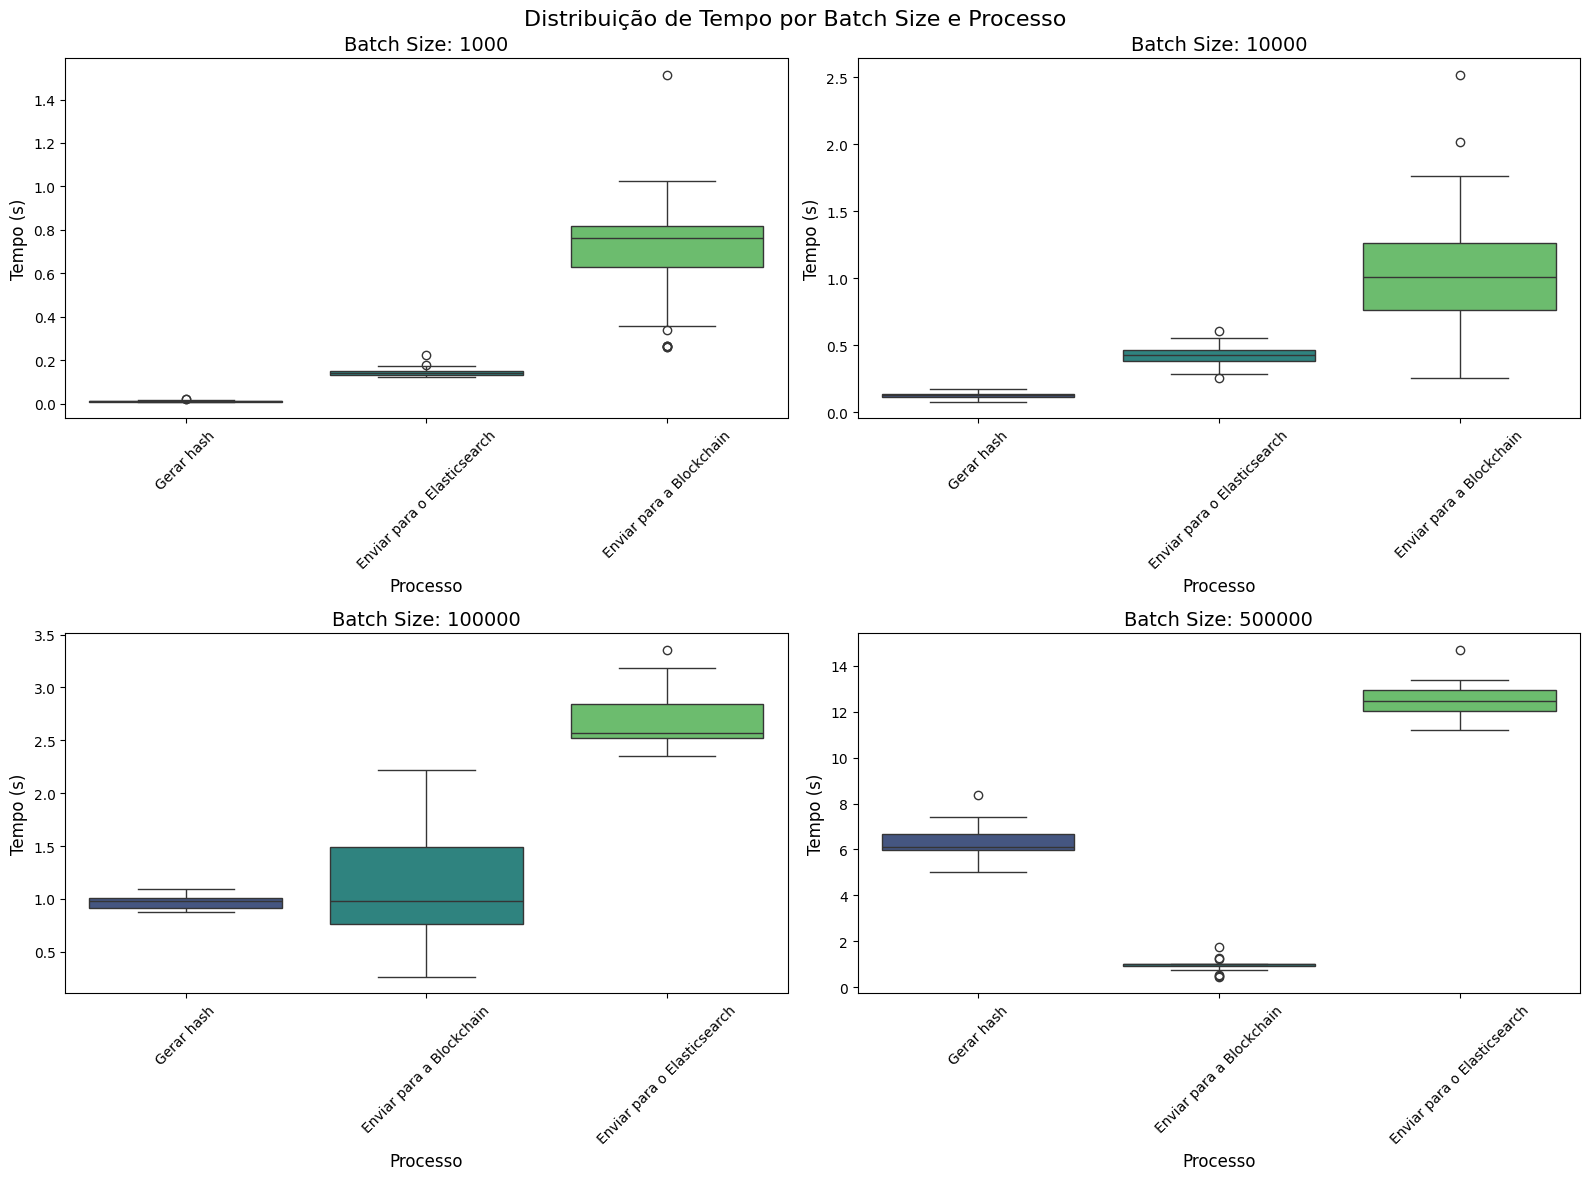

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o CSV
df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

# Aplicando a conversão de tempo
df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Obtendo os batch sizes únicos
batch_sizes = df['Batch Size'].unique()

# Configurando a figura com subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Achatar a matriz de axes para facilitar iteração
axes_flat = axes.flatten()

# Criando box plot para cada batch size
for i, batch_size in enumerate(batch_sizes):
    # Filtrando dados para o batch size atual
    df_batch = df[df['Batch Size'] == batch_size]

    # Criando o box plot
    sns.boxplot(x='Processo', y='Tempo', data=df_batch, ax=axes_flat[i], palette='viridis')

    # Configurações do subplot
    axes_flat[i].set_title(f'Batch Size: {batch_size}', fontsize=14)
    axes_flat[i].set_xlabel('Processo', fontsize=12)
    axes_flat[i].set_ylabel('Tempo (s)', fontsize=12)

    # Rotacionar labels do eixo x
    axes_flat[i].tick_params(axis='x', rotation=45)

# Configurações gerais da figura
fig.suptitle('Distribuição de Tempo por Batch Size e Processo', fontsize=16)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

plt.show()

/tmp/ipykernel_9519/2969819123.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Processo', y='Throughput', data=df_batch, ax=axes_flat[i], palette='viridis')
/tmp/ipykernel_9519/2969819123.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Processo', y='Throughput', data=df_batch, ax=axes_flat[i], palette='viridis')
/tmp/ipykernel_9519/2969819123.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Processo', y='Throughput', data=df_batch, ax=axes_flat[i], palette='viridis')
/tmp/ipykernel_9519/2969819123.py:38: FutureWarning:

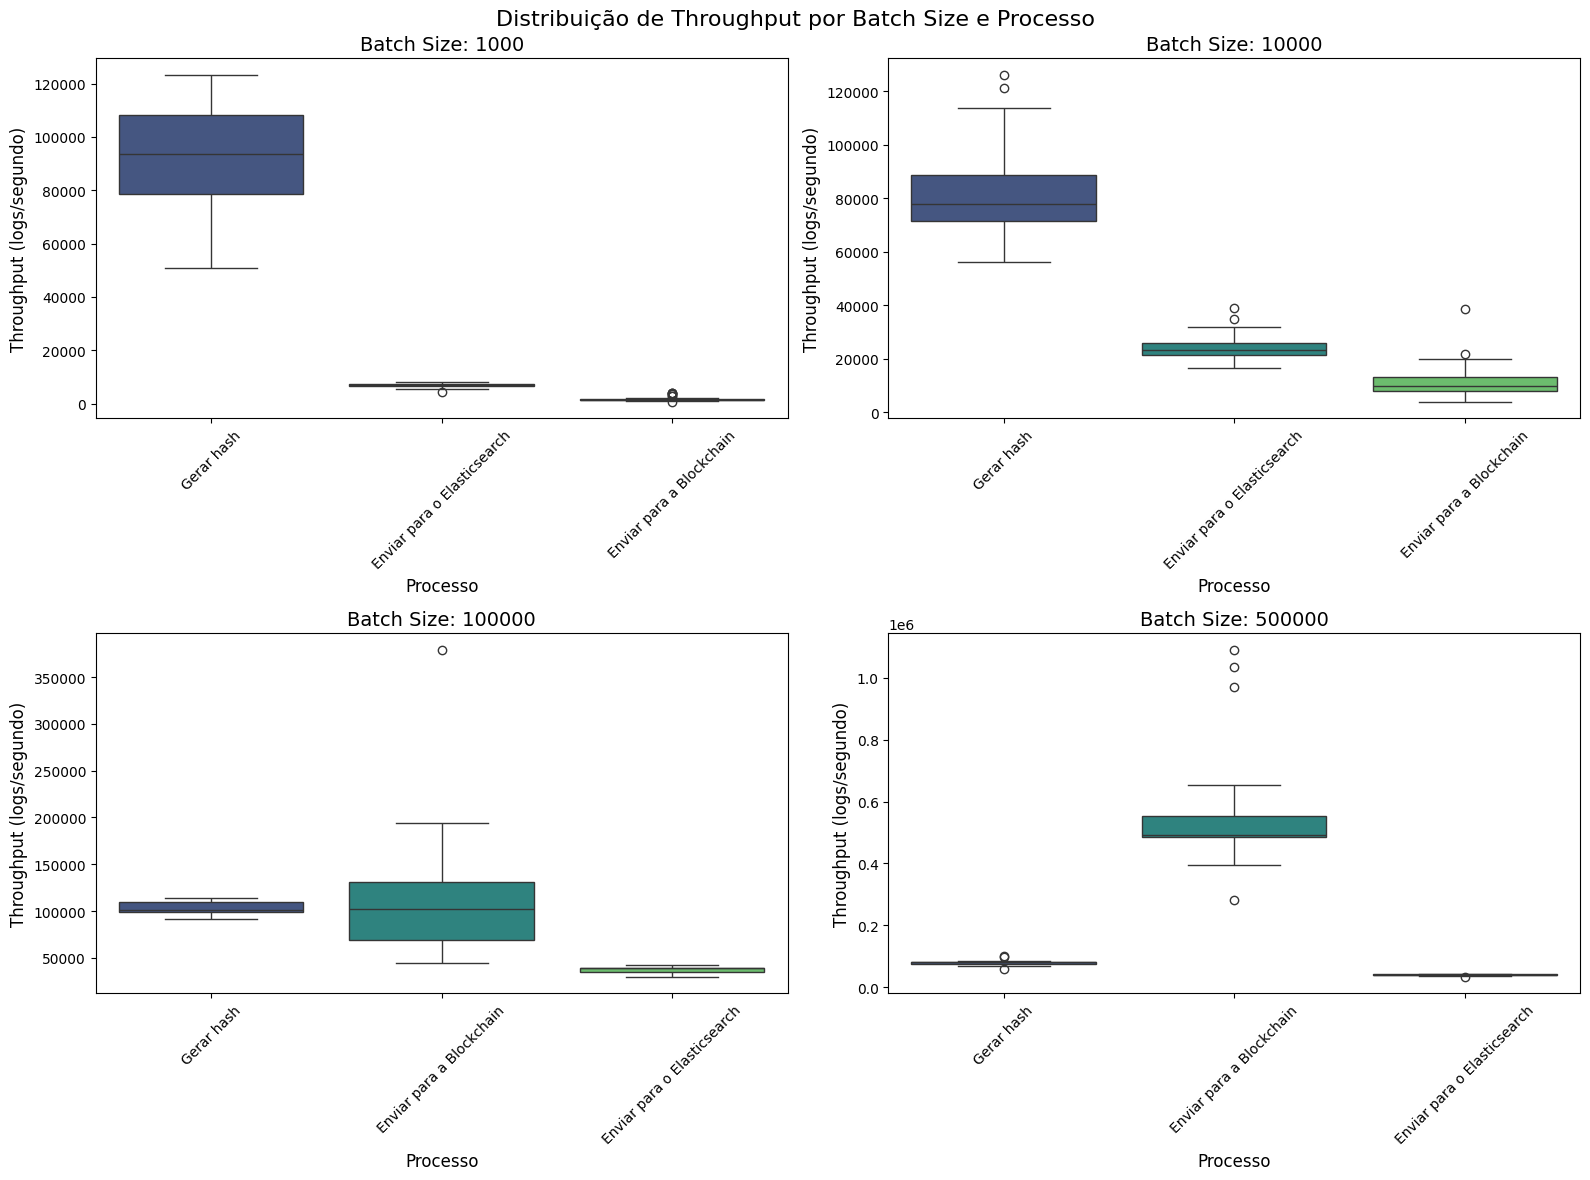

Estatísticas de Throughput:
                                        count           mean            std  \
Batch Size Processo                                                           
1000       Enviar para a Blockchain      60.0    1572.453785     784.525478   
           Enviar para o Elasticsearch   60.0    6986.772155     677.746007   
           Gerar hash                    60.0   93332.093185   19109.424662   
10000      Enviar para a Blockchain      63.0   11439.920339    5511.552151   
           Enviar para o Elasticsearch   63.0   24118.683768    4221.575780   
           Gerar hash                    63.0   80783.397632   14025.993918   
100000     Enviar para a Blockchain      12.0  121049.966779   91568.559053   
           Enviar para o Elasticsearch   12.0   37326.662730    3832.252090   
           Gerar hash                    12.0  103102.350685    7030.747500   
500000     Enviar para a Blockchain      16.0  579423.361667  237455.676079   
           Enviar para o

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o CSV
df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

# Aplicando a conversão de tempo
df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Calculando o throughput
df['Throughput'] = df['Batch Size'] / df['Tempo']

# Obtendo os batch sizes únicos
batch_sizes = df['Batch Size'].unique()

# Configurando a figura com subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Achatar a matriz de axes para facilitar iteração
axes_flat = axes.flatten()

# Criando box plot para cada batch size
for i, batch_size in enumerate(batch_sizes):
    # Filtrando dados para o batch size atual
    df_batch = df[df['Batch Size'] == batch_size]

    # Criando o box plot
    sns.boxplot(x='Processo', y='Throughput', data=df_batch, ax=axes_flat[i], palette='viridis')

    # Configurações do subplot
    axes_flat[i].set_title(f'Batch Size: {batch_size}', fontsize=14)
    axes_flat[i].set_xlabel('Processo', fontsize=12)
    axes_flat[i].set_ylabel('Throughput (logs/segundo)', fontsize=12)

    # Rotacionar labels do eixo x
    axes_flat[i].tick_params(axis='x', rotation=45)

# Configurações gerais da figura
fig.suptitle('Distribuição de Throughput por Batch Size e Processo', fontsize=16)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

plt.show()

# Estatísticas descritivas do throughput
throughput_stats = df.groupby(['Batch Size', 'Processo'])['Throughput'].describe()
print("Estatísticas de Throughput:")
print(throughput_stats)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o CSV
df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

# Aplicando a conversão de tempo
df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Obtendo os batch sizes únicos
batch_sizes = df['Batch Size'].unique()

# Criando um box plot para cada batch size
for batch_size in batch_sizes:
    # Filtrando dados para o batch size atual
    df_batch = df[df['Batch Size'] == batch_size]

    # Criando uma nova figura
    plt.figure(figsize=(10, 6))

    # Criando o box plot
    ax = sns.boxplot(x='Processo', y='Tempo', data=df_batch, palette='viridis')

    # Configurações do subplot
    plt.title(f'Batch Size: {batch_size}', fontsize=14)
    plt.xlabel('', fontsize=12)
    plt.ylabel('Tempo (s)', fontsize=12)

    # Rotacionar labels do eixo x
    plt.xticks(rotation=45)

    # Ajustar escala do eixo y
    if batch_size in batch_sizes[:2]:  # Primeiros dois batch sizes
        plt.ylim(0, 2.5)
    else:  # Últimos dois batch sizes
        plt.ylim(0, 14)

    # Ajustar layout
    plt.tight_layout()

    # Salvar a imagem
    plt.savefig(f'boxplot_batch_size_{batch_size}.png')

    # Fechar a figura para liberar memória
    plt.close()

print("Imagens de boxplot geradas com sucesso!")

/tmp/ipykernel_17039/2219020566.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Processo', y='Tempo', data=df_batch, palette='viridis')
/tmp/ipykernel_17039/2219020566.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Processo', y='Tempo', data=df_batch, palette='viridis')
/tmp/ipykernel_17039/2219020566.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Processo', y='Tempo', data=df_batch, palette='viridis')
/tmp/ipykernel_17039/2219020566.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is

Imagens de boxplot geradas com sucesso!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o CSV
df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

# Aplicando a conversão de tempo
df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Obtendo os batch sizes únicos
batch_sizes = df['Batch Size'].unique()

# Definindo a ordem e cores dos processos
processo_ordem = ['Enviar para blockchain', 'Enviar para o elasticsearch', 'Gerar hash']
processo_cores = ['blue', 'orange', 'green']

# Criando um box plot para cada batch size
for batch_size in batch_sizes:
    # Filtrando dados para o batch size atual
    df_batch = df[df['Batch Size'] == batch_size]

    # Reordenando os dados conforme a ordem especificada
    df_batch['Processo'] = pd.Categorical(df_batch['Processo'], categories=processo_ordem, ordered=True)
    df_batch = df_batch.sort_values('Processo')

    # Criando uma nova figura
    plt.figure(figsize=(10, 6))

    # Criando o box plot com cores personalizadas
    ax = sns.boxplot(x='Processo', y='Tempo', data=df_batch, palette=processo_cores)

    # Configurações do subplot
    plt.title(f'Batch Size: {batch_size}', fontsize=14)
    plt.xlabel('', fontsize=12)
    plt.ylabel('Tempo (s)', fontsize=12)

    # Rotacionar labels do eixo x
    plt.xticks(rotation=45, ha='right')

    # Ajustar escala do eixo y
    if batch_size in batch_sizes[:2]:  # Primeiros dois batch sizes
        plt.ylim(0, 2.5)
    else:  # Últimos dois batch sizes
        plt.ylim(0, 14)

    # Ajustar layout
    plt.tight_layout()

    # Salvar a imagem
    plt.savefig(f'boxplot_batch_size_{batch_size}.png')

    # Fechar a figura para liberar memória
    plt.close()

print("Imagens de boxplot geradas com sucesso!")

/tmp/ipykernel_17039/823466655.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch['Processo'] = pd.Categorical(df_batch['Processo'], categories=processo_ordem, ordered=True)
/tmp/ipykernel_17039/823466655.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Processo', y='Tempo', data=df_batch, palette=processo_cores)
/tmp/ipykernel_17039/823466655.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Imagens de boxplot geradas com sucesso!


/tmp/ipykernel_17039/823466655.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch['Processo'] = pd.Categorical(df_batch['Processo'], categories=processo_ordem, ordered=True)
/tmp/ipykernel_17039/823466655.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Processo', y='Tempo', data=df_batch, palette=processo_cores)
/tmp/ipykernel_17039/823466655.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o CSV
df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

# Aplicando a conversão de tempo
df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Obtendo os batch sizes únicos
batch_sizes = df['Batch Size'].unique()

# Definindo a ordem e cores dos processos
processo_ordem = ['Enviar para a Blockchain', 'Enviar para o Elasticsearch', 'Gerar hash']
processo_cores = ['blue', 'orange', 'green']

# Criando um box plot para cada batch size
for batch_size in batch_sizes:
    # Filtrando dados para o batch size atual
    df_batch = df[df['Batch Size'] == batch_size]

    # Reordenando os dados conforme a ordem especificada
    df_batch['Processo'] = pd.Categorical(df_batch['Processo'], categories=processo_ordem, ordered=True)
    df_batch = df_batch.sort_values('Processo')

    # Criando uma nova figura
    plt.figure(figsize=(10, 6))

    # Criando o box plot com cores personalizadas
    ax = sns.boxplot(x='Processo', y='Tempo', data=df_batch, palette=processo_cores)

    # Configurações do subplot
    #plt.title(f'Batch Size: {batch_size}', fontsize=14)
    plt.xlabel('', fontsize=20)
    plt.ylabel('Tempo (s)', fontsize=16)

    # Rotacionar labels do eixo x
    plt.xticks(rotation=45, ha='right', fontsize=16)

    # Ajustar escala do eixo y
    if batch_size in batch_sizes[:2]:  # Primeiros dois batch sizes
        plt.ylim(0, 2.5)
    else:  # Últimos dois batch sizes
        plt.ylim(0, 14)

    # Ajustar layout
    plt.tight_layout()

    # Salvar a imagem
    plt.savefig(f'boxplot_batch_size_{batch_size}.png')

    # Fechar a figura para liberar memória
    plt.close()

print("Imagens de boxplot geradas com sucesso!")

/tmp/ipykernel_17039/916804859.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch['Processo'] = pd.Categorical(df_batch['Processo'], categories=processo_ordem, ordered=True)
/tmp/ipykernel_17039/916804859.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Processo', y='Tempo', data=df_batch, palette=processo_cores)
/tmp/ipykernel_17039/916804859.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Imagens de boxplot geradas com sucesso!
